Se ha utilizado un cuadernillo para google colab, el cual utiliza lenguaje phyton y recursos computacionales en la nube. por las demandas del proyecto se contrato un servisio de paga que amplia las capacidades de procesamiento.

se instala el framework ultralytics para disponer y acceder a la funcionalidad del modelo preentrenado yolo8, en sus capacidades de segmentacion semantica

In [9]:
# Instala ultralytics
%pip install ultralytics
# Importa libreria ultralytics
import ultralytics
# Revisa y visualiza las capacidades computacionales del computador virtual
ultralytics.checks()

Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.3/78.2 GB disk)


Se va ha descargar el modelo preentrenado yolov8m-seg.pt

In [10]:
# !yolo predict model=yolov8l-seg.pt source='https://ultralytics.com/images/bus.jpg'

integramos nuestro google drive a este computador para acceder a informacion almacenada en el mismo

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


instalamos librerias roboflow, que nos permitiran acceder a nuestro dataset (imagenes,marcaciones en formato yolo8)

In [12]:
#!pip install roboflow

#from roboflow import Roboflow
#rf = Roboflow(api_key="AmvwAaAnxUgw9B1Q6s4N")
#project = rf.workspace("jhenny-miranda").project("quirpinchaca")
#dataset = project.version(29).download("yolov8")


Importamos el objeto yolo dr la libreria ultralytics para utilizar el modelo para el entrenamiento con datos especificos (residuos solidos en las orillas del rio), porque el modelo no reconoce este tipo de objetos en estas circunstancias.
importamos las clase display e Image de la libreria de IPhyton.display para visualizar las fotografias cuando asi se requieran

In [13]:
from ultralytics import YOLO

from IPython.display import display, Image

creamos object model de la clase YOLO que utiliza un modelo preentrenado yolov8m-seg.pt

In [14]:
# model = YOLO(f'/content/yolov8n-seg.pt')
# model = YOLO(f'/content/drive/MyDrive/JMB/checkpoints/best_13102023_l.pt')

# model = YOLO(f'/content/drive/MyDrive/JMB/dataset/runs/segment/train/segment/train/weights/epoch4.pt')

# results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

In [15]:
# %cd /content/drive/MyDrive/JMB/dataset

In [16]:
# !ls

In [17]:
from ultralytics import settings

# Update a setting
settings.update({'runs_dir': '/content/drive/MyDrive/Platos.v2i.yolov8/runs/segment/train'})

In [18]:
# !yolo task=detect mode=train model=yolov8n-seg.pt data= /content/dataset-29/data.yaml epochs=2 imgsz=640 plots=True save_period=1
!yolo task=detect mode=train model=yolov8l-seg.pt data= /content/drive/MyDrive/Platos.v2i.yolov8/data.yaml epochs=45 imgsz=640 save_period=1
#!yolo task=detect mode=train resume model=/content/drive/MyDrive/JMB/checkpoints/last_25102023_0251_l.pt data= /content/drive/MyDrive/JMB/dataset/data.yaml epochs=40 imgsz=640 plots=True save_period=1

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
Ultralytics YOLOv8.0.208 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/drive/MyDrive/Platos.v2i.yolov8/data.yaml, epochs=45, patience=50, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stre

In [21]:
!ls /content/drive/MyDrive/Platos.v2i.yolov8/runs/segment/train

segment


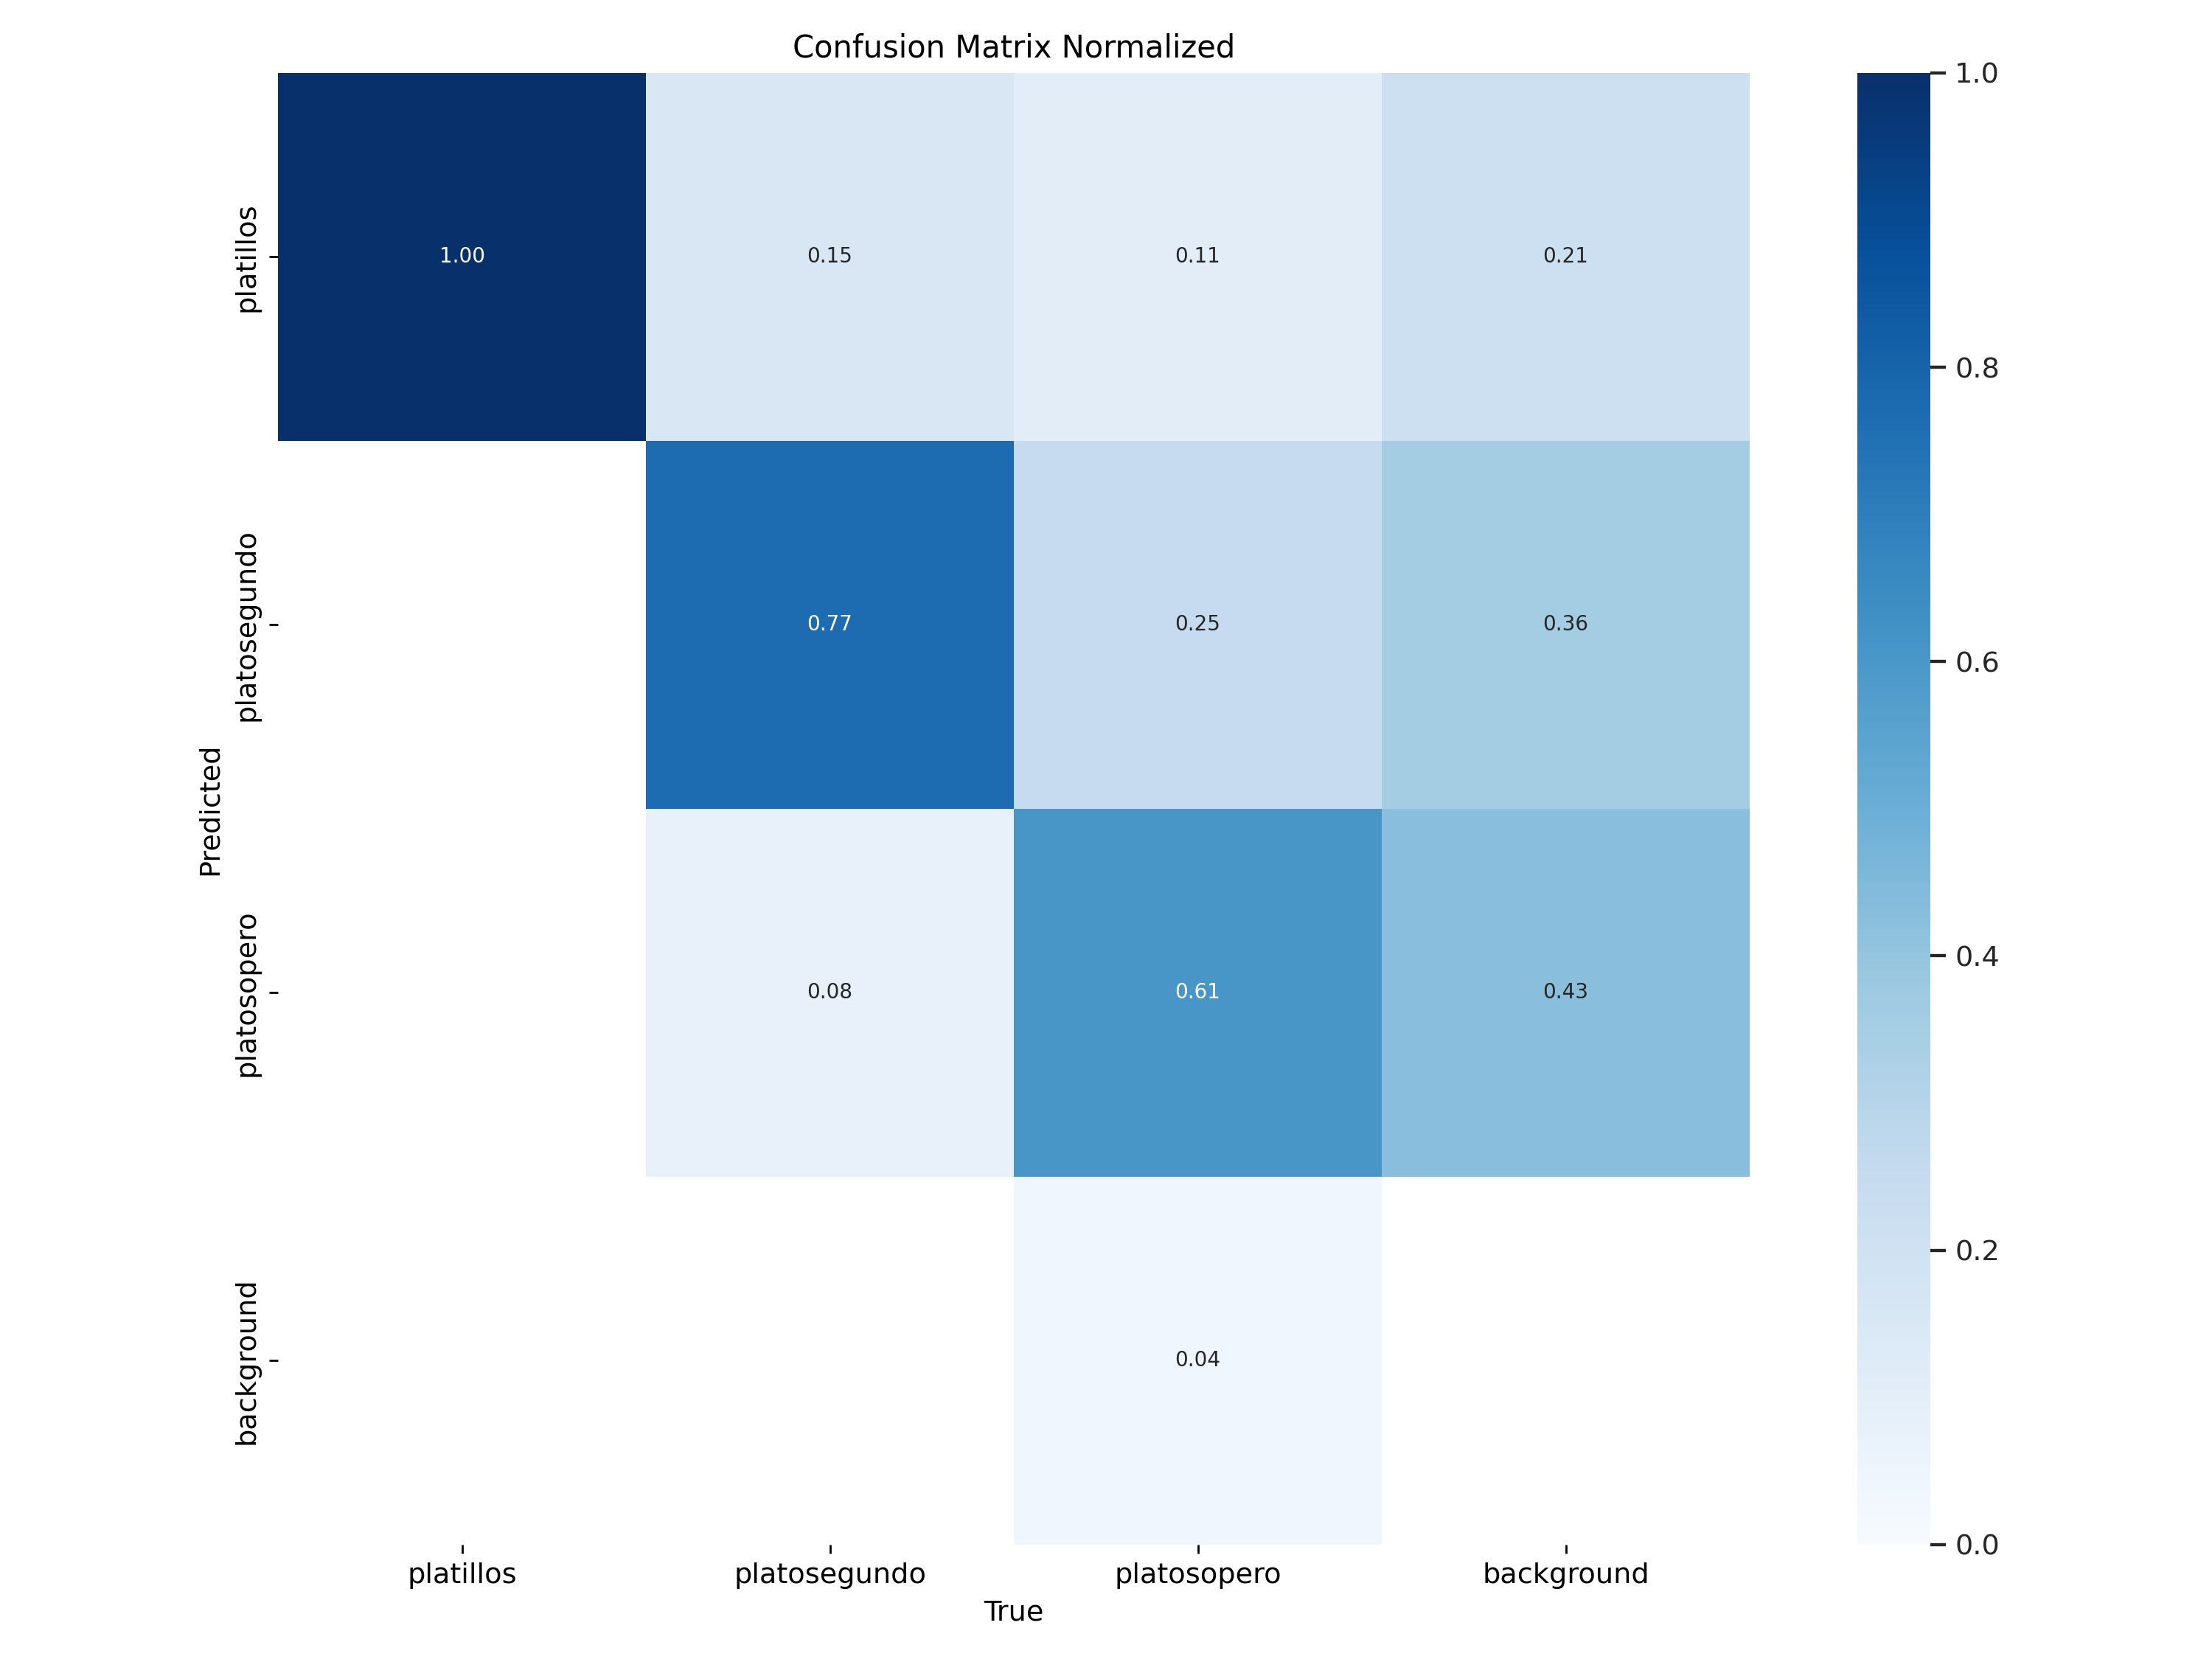

In [22]:
#/content/drive/MyDrive/Yolo/Platos.v2i.yolov8/runs/segment/train/segment/train3/confusion_matrix_normalized.png
Image(filename='/content/drive/MyDrive/Platos.v2i.yolov8/runs/segment/train/segment/train/confusion_matrix_normalized.png', width=800)

In [23]:
!ls /content/drive/MyDrive/Platos.v2i.yolov8/runs/segment/train/segment/train

args.yaml					     labels.jpg        train_batch2135.jpg
BoxF1_curve.png					     MaskF1_curve.png  train_batch2136.jpg
BoxP_curve.png					     MaskP_curve.png   train_batch2137.jpg
BoxPR_curve.png					     MaskPR_curve.png  train_batch2.jpg
BoxR_curve.png					     MaskR_curve.png   val_batch0_labels.jpg
confusion_matrix_normalized.png			     results.csv       val_batch0_pred.jpg
confusion_matrix.png				     results.png       val_batch1_labels.jpg
events.out.tfevents.1699585174.deb7bea504a6.11845.0  train_batch0.jpg  val_batch1_pred.jpg
labels_correlogram.jpg				     train_batch1.jpg  weights


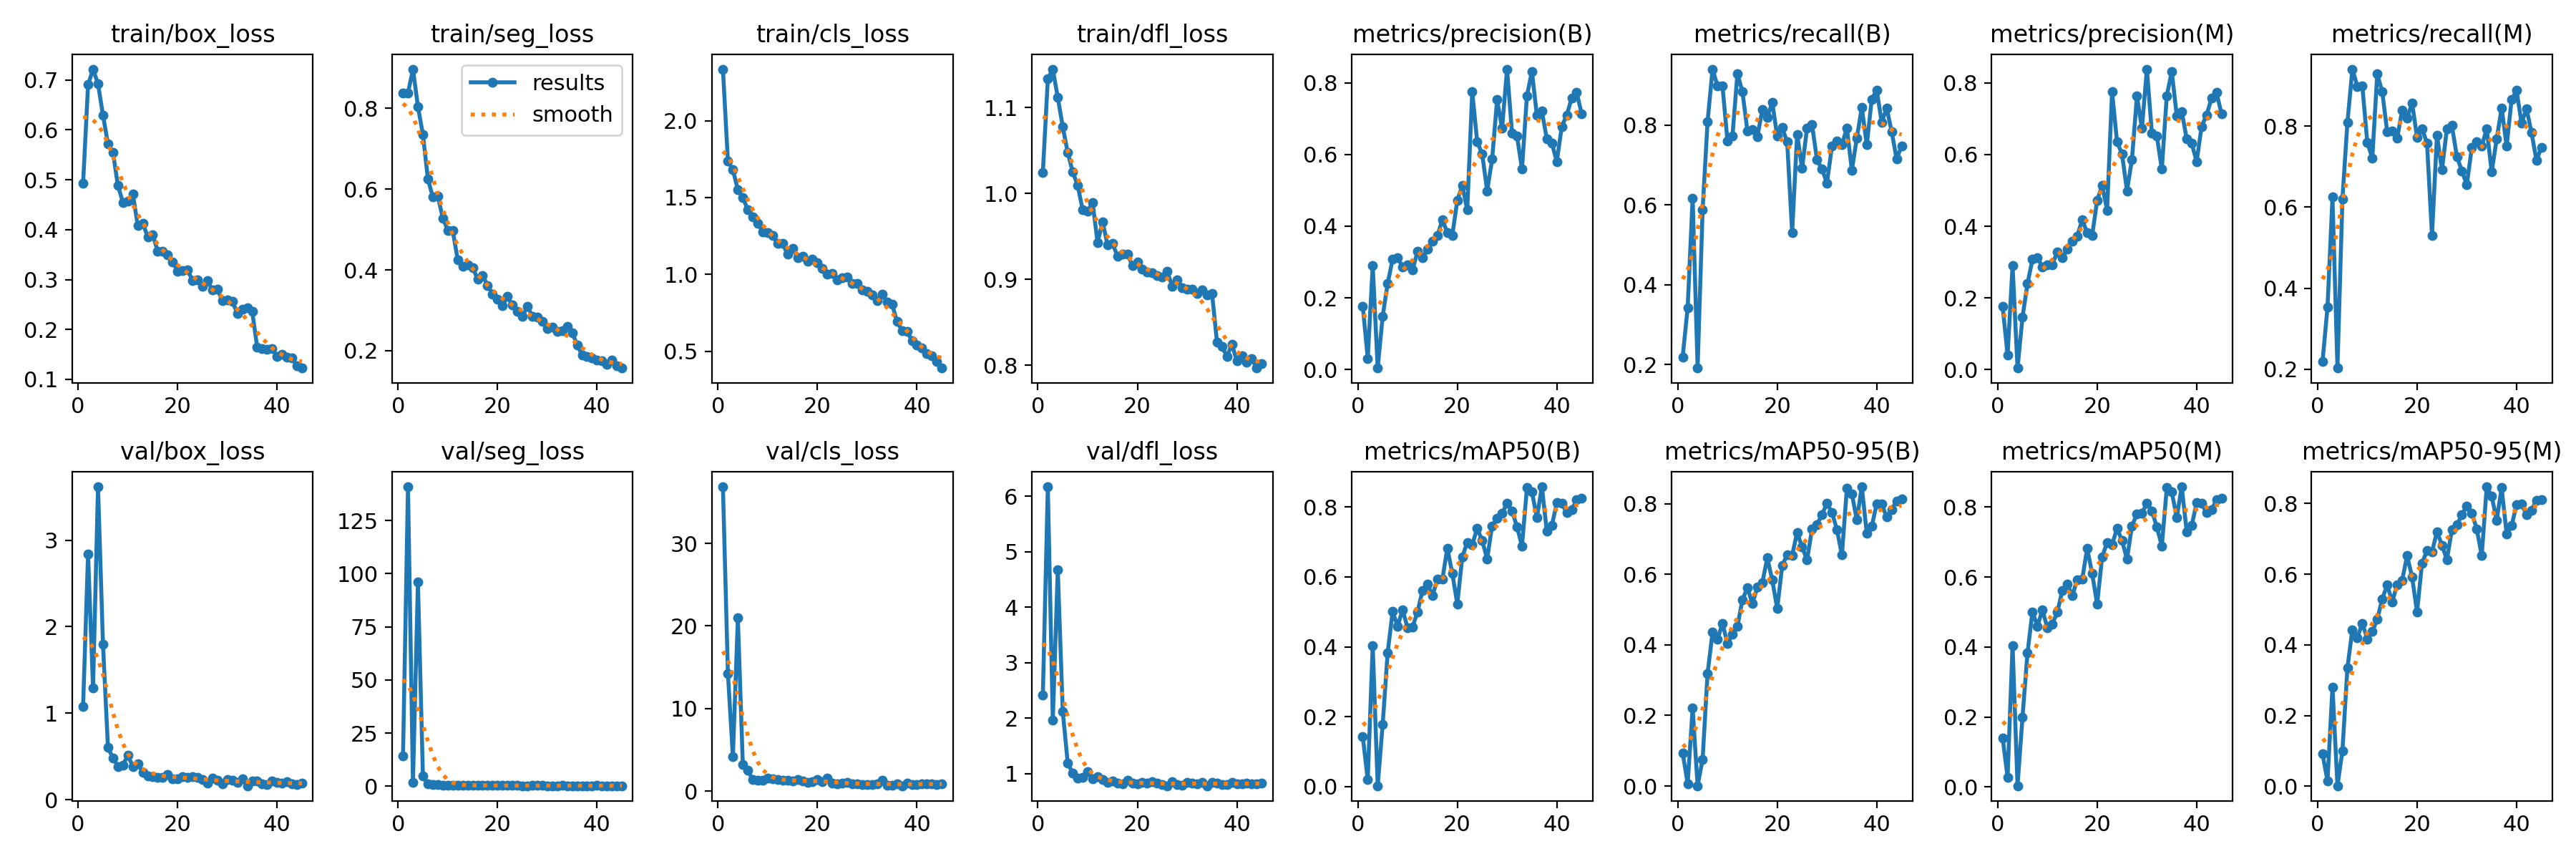

In [25]:
Image(filename='/content/drive/MyDrive/Platos.v2i.yolov8/runs/segment/train/segment/train/results.png', width=800)

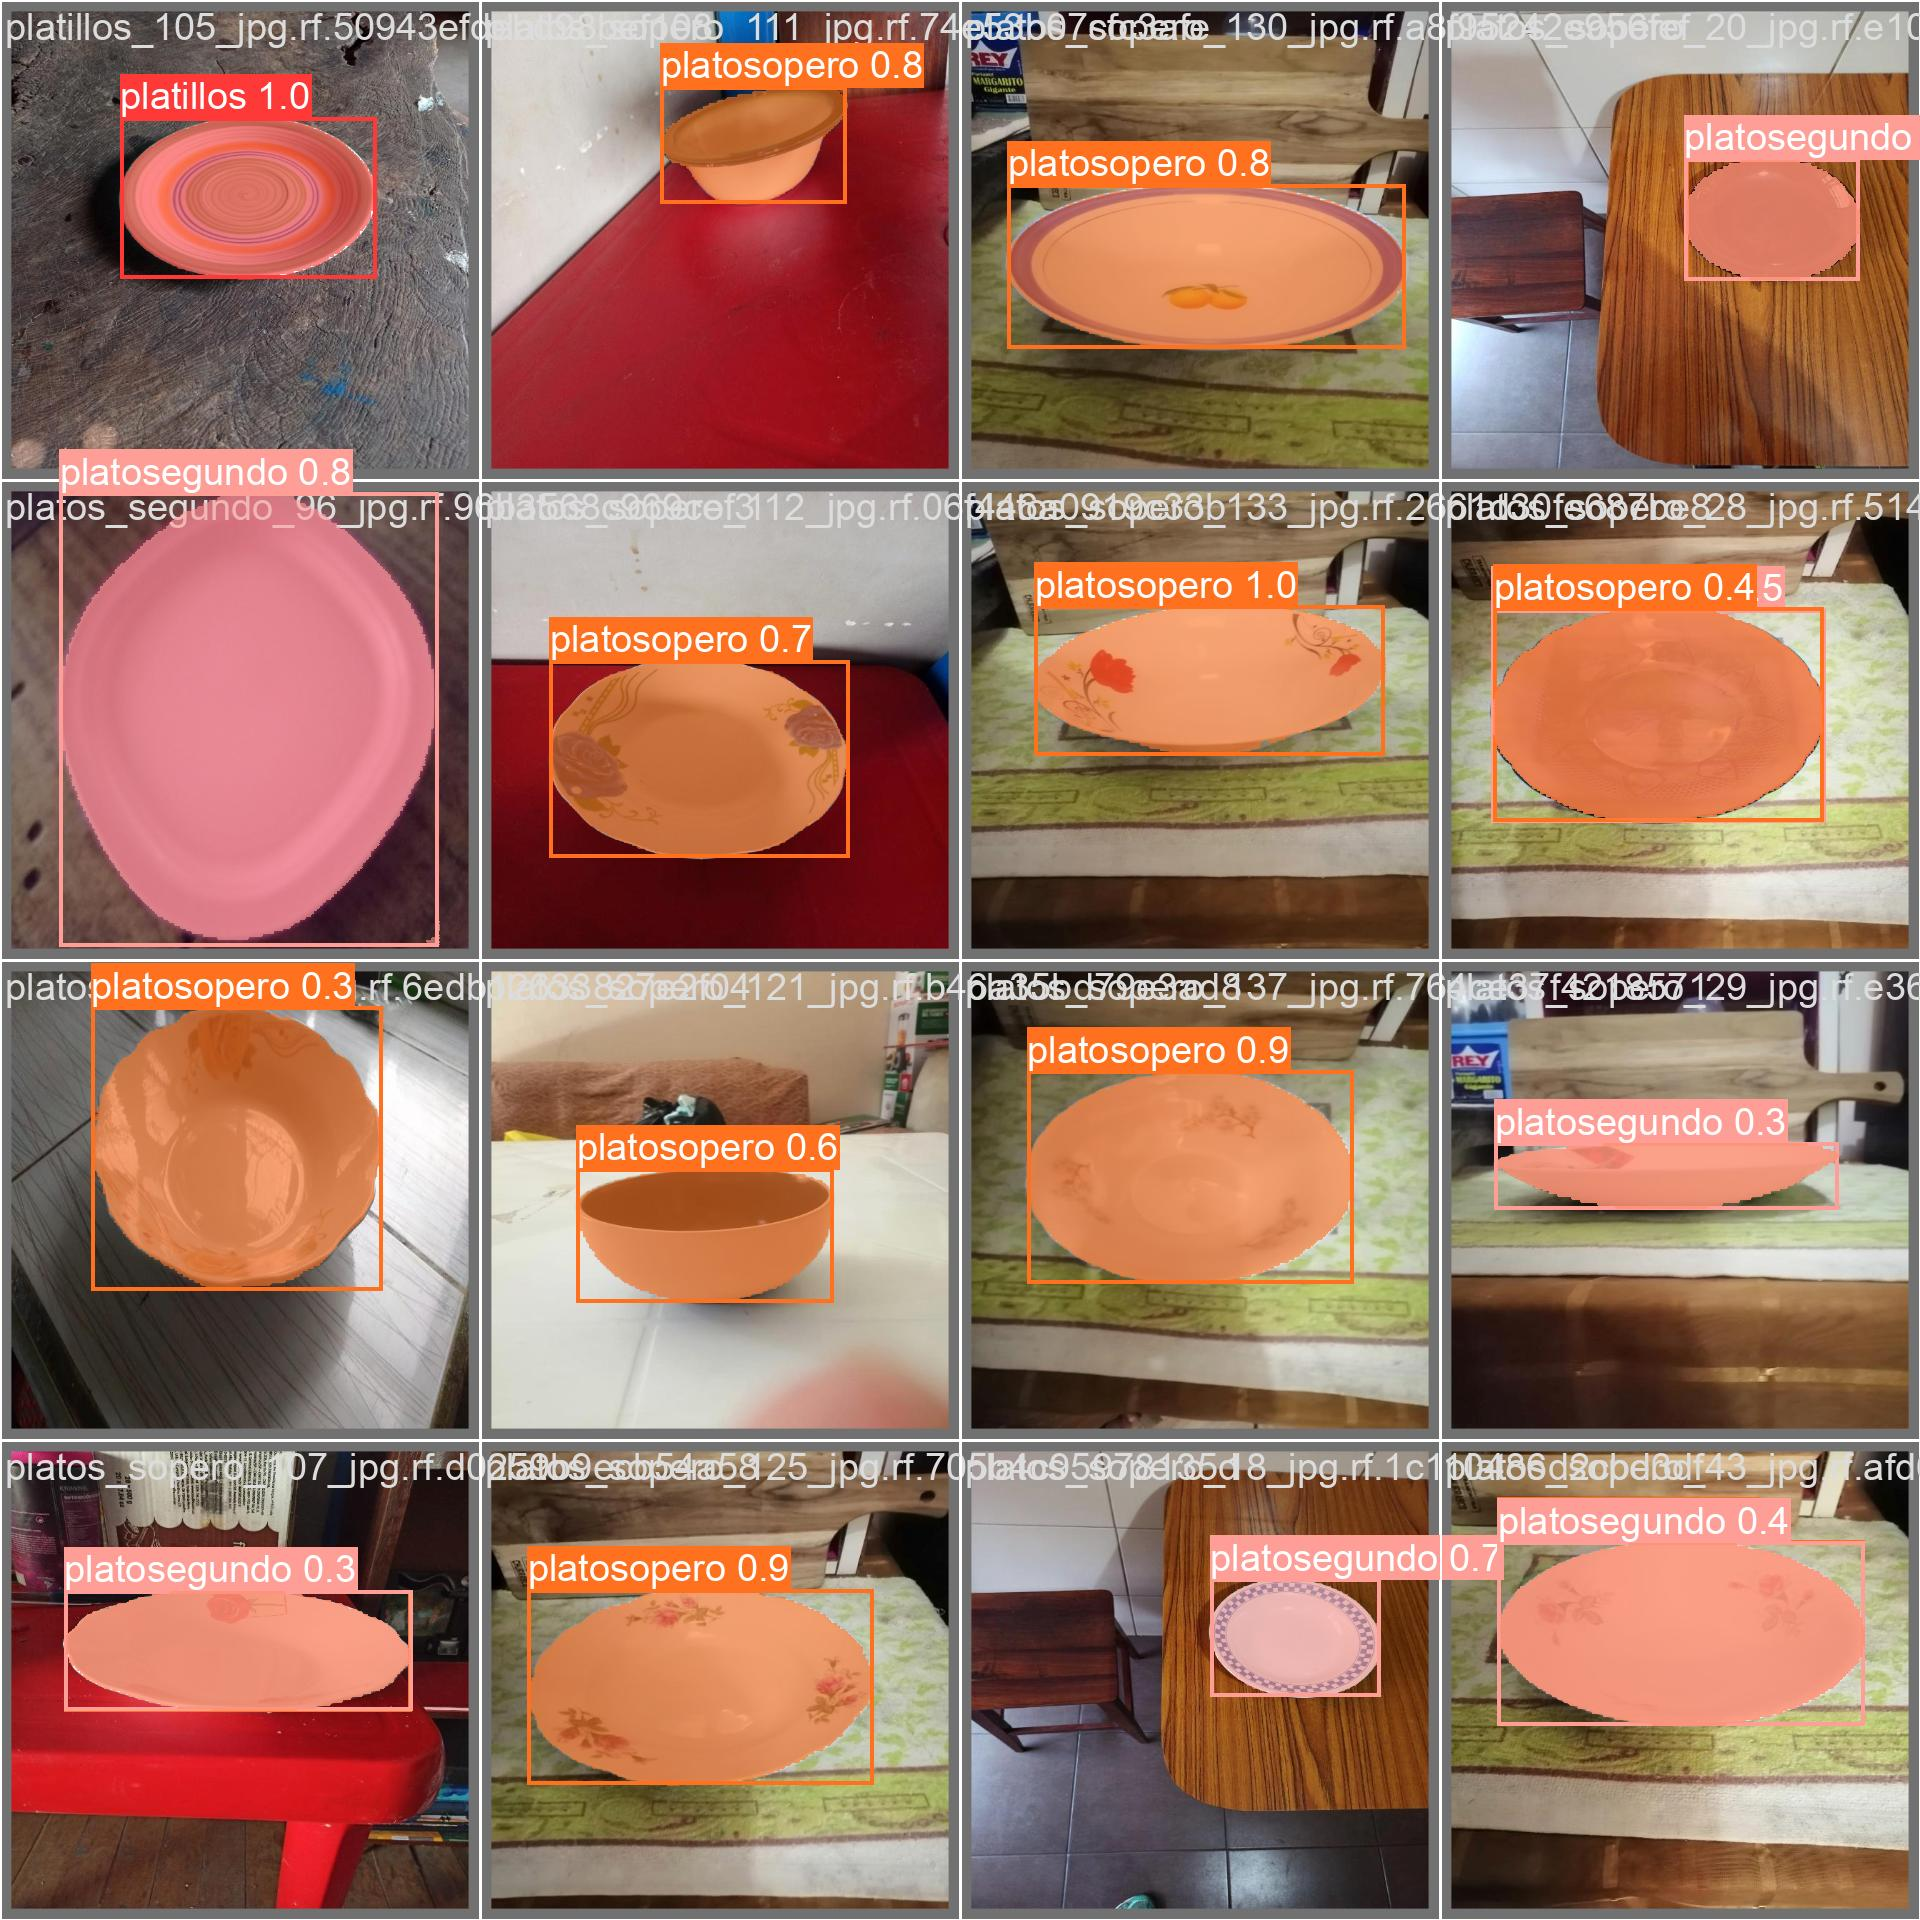

In [26]:
Image(filename='/content/drive/MyDrive/Platos.v2i.yolov8/runs/segment/train/segment/train/val_batch0_pred.jpg', width=1000)

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Platos.v2i.yolov8/runs/segment/train/segment/train/weights/best.pt data=/content/drive/MyDrive/Platos.v2i.yolov8/data.yaml

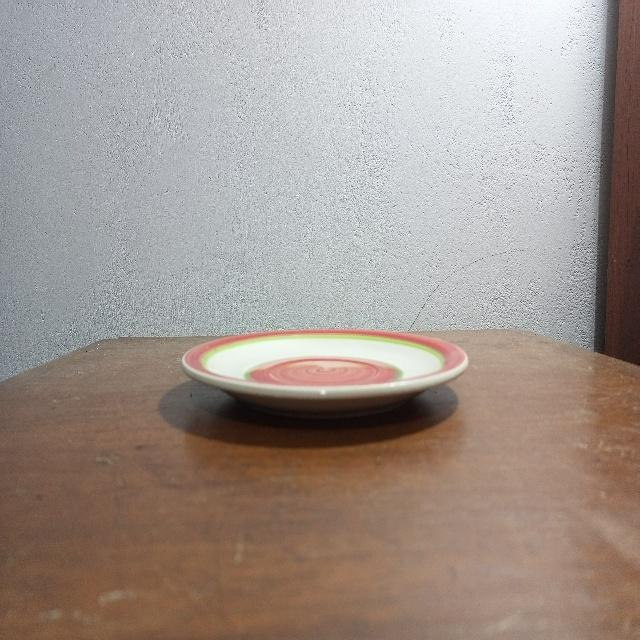

In [31]:
import cv2
from IPython.display import Image
from ultralytics import YOLO
#/content/drive/MyDrive/Platos.v2i.yolov8/test/images/platillos_92_jpg.rf.5cc7c177b12f4f94462861a3502de46b.jpg
img_name='platillos_92_jpg.rf.5cc7c177b12f4f94462861a3502de46b'
img =cv2.imread(f"/content/drive/MyDrive/Platos.v2i.yolov8/test/images/{img_name}.jpg")
# Mostrar la imagen en una ventana
Image(filename=f"/content/drive/MyDrive/Platos.v2i.yolov8/test/images/{img_name}.jpg", width=600)

In [32]:
model= YOLO("/content/drive/MyDrive/Platos.v2i.yolov8/runs/segment/train/segment/train/weights/best.pt")
pred= model.predict(img)[0]
pred= pred.plot()
cv2.imwrite(f"{img_name}.jpg", pred)


0: 640x640 1 platillos, 76.8ms
Speed: 2.1ms preprocess, 76.8ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


True

In [33]:
%cd /content/drive/MyDrive/Platos.v2i.yolov8
!ls

/content/drive/MyDrive/Platos.v2i.yolov8
data.yaml						  README.dataset.txt   runs  train
platillos_92_jpg.rf.5cc7c177b12f4f94462861a3502de46b.jpg  README.roboflow.txt  test  valid


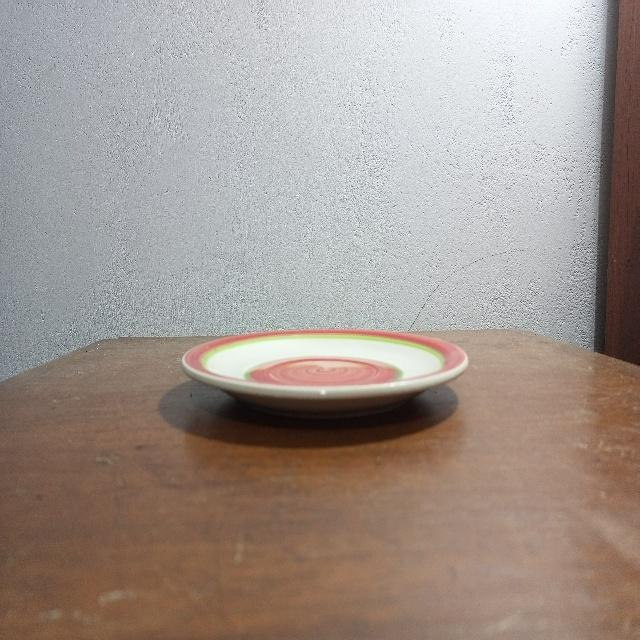

In [34]:
Image(filename=f"/content/drive/MyDrive/Platos.v2i.yolov8/test/images/{img_name}.jpg", width=640)